**Link dos arquivos:**

https://github.com/alura-cursos/introducao-a-data-science/archive/aula0.zip

**ou diretamente do site:**

grouplens.org/datasets/movielens


# Analisando as notas em Geral

In [ ]:
import pandas as pd

In [ ]:
notas = pd.read_csv('/content/ratings.csv')

In [ ]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.shape

(100836, 4)

In [ ]:
notas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
notas.size

403344

In [ ]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [ ]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [ ]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
notas['nota'].count()

100836

In [ ]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [ ]:
# média

notas['nota'].mean()

3.501556983616962

In [ ]:
notas.nota

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [ ]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

<Axes: >

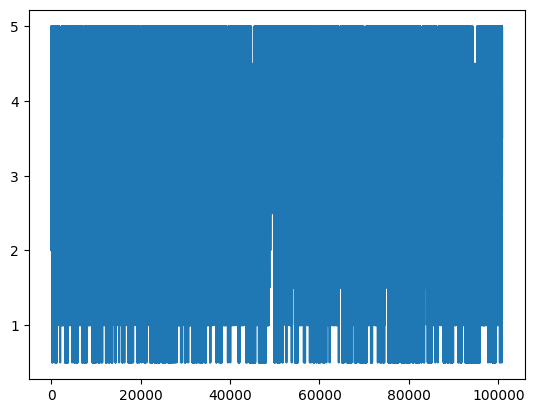

In [ ]:
notas.nota.plot()

<Axes: ylabel='Frequency'>

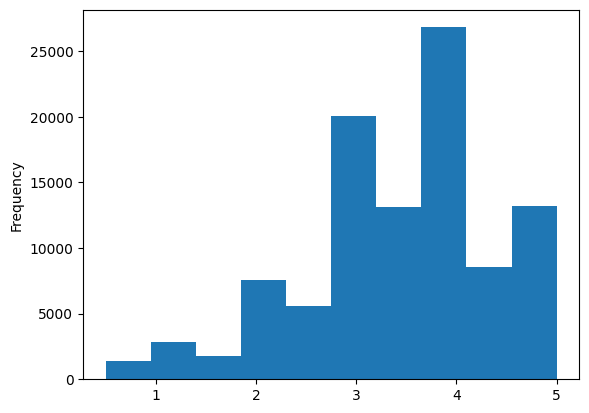

In [ ]:
notas.nota.plot(kind='hist')

In [ ]:
notas['nota'].median()

3.5

In [ ]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [ ]:
import seaborn as sns

<Axes: ylabel='nota'>

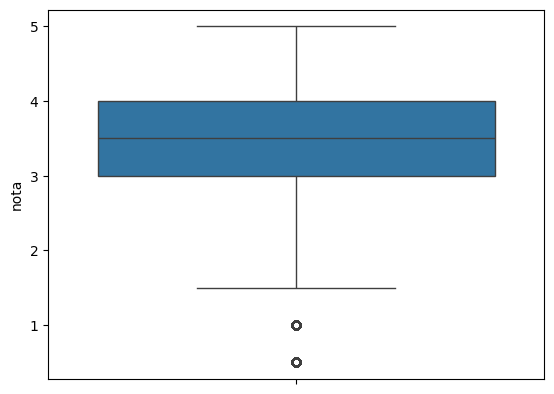

In [ ]:
sns.boxplot(notas.nota)

# Olhando os filmes

In [ ]:
filmes = pd.read_csv('/content/movies.csv')

In [ ]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
filmes.columns = ['filmeId', 'titulo', 'generos']

In [ ]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas.query('filmeId==1')

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [ ]:
notas.query('filmeId==1').nota

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

# Analisando algumas notas específicas por filme

In [ ]:
notas.query('filmeId==1').nota.mean()

3.9209302325581397

In [ ]:
notas.query('filmeId==2').nota.mean()

3.4318181818181817

In [ ]:
notas.groupby('filmeId')

In [ ]:
notas.groupby('filmeId').mean()

,usuarioId,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [ ]:
notas.groupby('filmeId').mean()['nota']

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [ ]:
medias_por_filme = notas.groupby('filmeId').mean()['nota']

In [ ]:
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

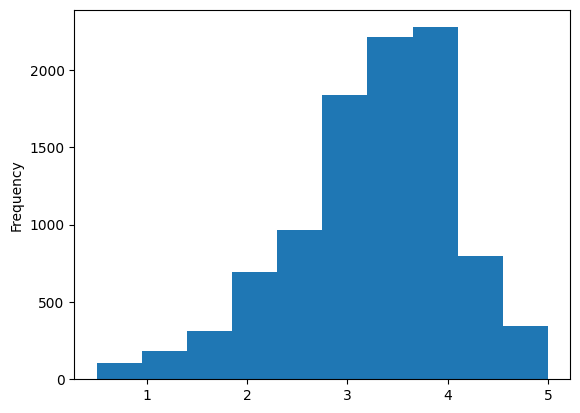

In [ ]:
medias_por_filme.plot(kind='hist')

<Axes: ylabel='nota'>

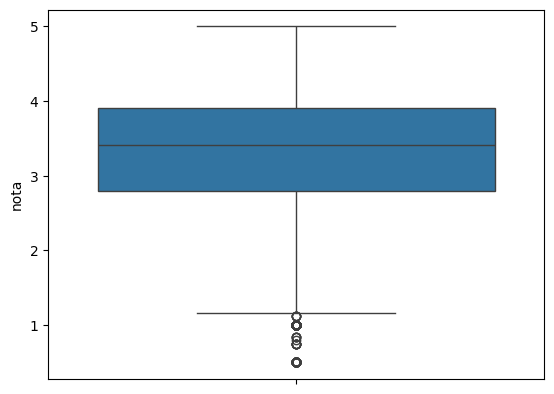

In [ ]:
sns.boxplot(medias_por_filme)

In [ ]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

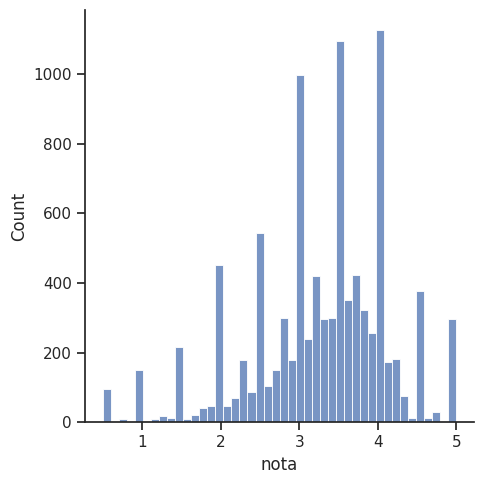

In [ ]:
sns.displot(medias_por_filme)

<ipython-input-232-5bf8cca2d6c7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme, bins=10)


<Axes: xlabel='nota', ylabel='Density'>

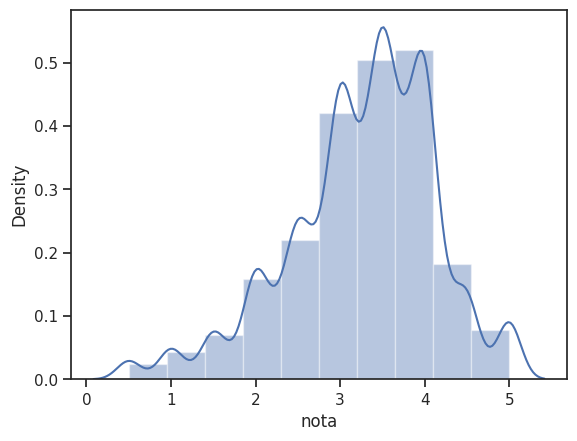

In [ ]:
sns.distplot(medias_por_filme, bins=10)

<ipython-input-233-118057a176bb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme, bins=20)


<Axes: xlabel='nota', ylabel='Density'>

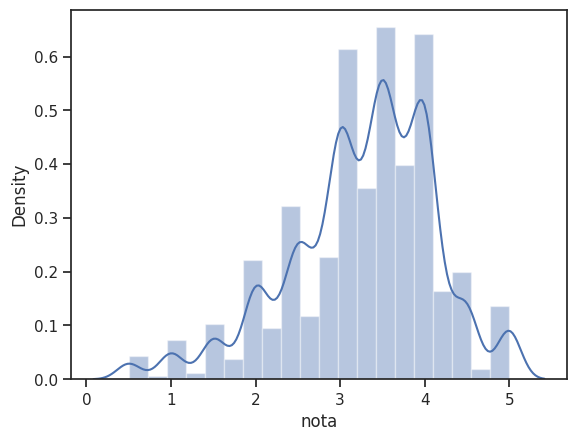

In [ ]:
sns.distplot(medias_por_filme, bins=20)

<ipython-input-234-babd4fb8b5bf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme, bins=3)


<Axes: xlabel='nota', ylabel='Density'>

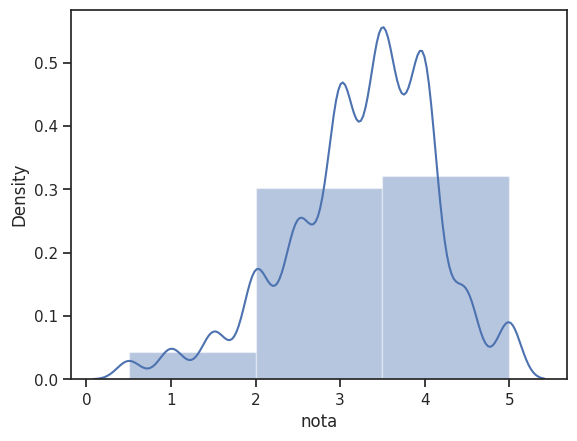

In [ ]:
sns.distplot(medias_por_filme, bins=3)

In [ ]:
import matplotlib.pyplot as plt

(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

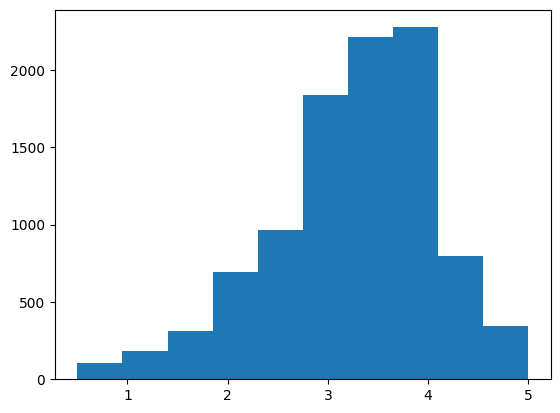

In [ ]:
plt.hist(medias_por_filme)

<Axes: xlabel='nota'>

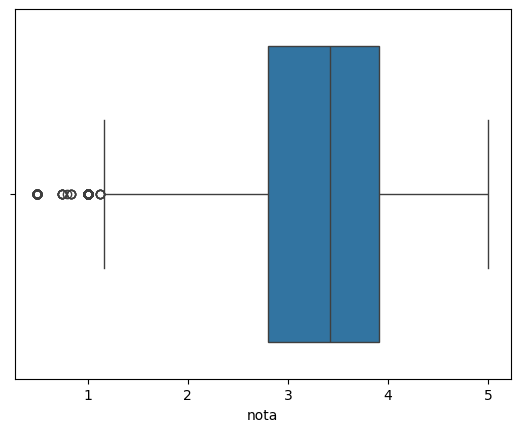

In [ ]:
sns.boxplot(x=medias_por_filme)

<Axes: xlabel='nota'>

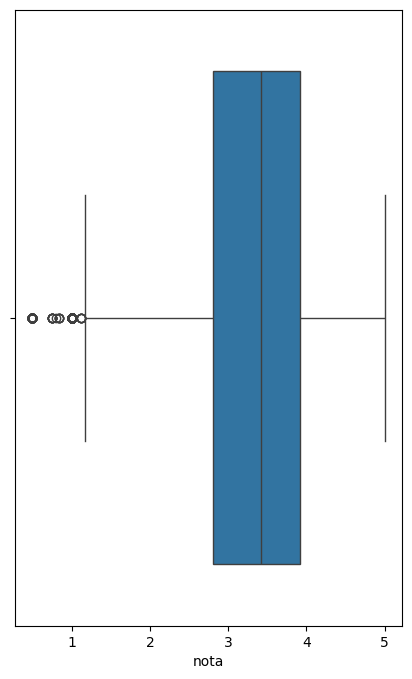

In [ ]:
plt.figure(figsize=(5,8))
sns.boxplot(x=medias_por_filme)

# TMDB site:

https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?resource=download

In [ ]:
tmdb = pd.read_csv('/content/tmdb_5000_movies.csv')

In [ ]:
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
tmdb['original_language']

0       en
1       en
2       en
3       en
4       en
        ..
4798    es
4799    en
4800    en
4801    en
4802    en
Name: original_language, Length: 4803, dtype: object

In [ ]:
tmdb['original_language'].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

In [ ]:
tmdb['original_language'].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object')

In [ ]:
tmdb['original_language'].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [ ]:
tmdb['original_language'].value_counts().info()

<class 'pandas.core.series.Series'>
Index: 37 entries, en to el
Series name: original_language
Non-Null Count  Dtype
--------------  -----
37 non-null     int64
dtypes: int64(1)
memory usage: 592.0+ bytes


In [ ]:
tmdb['original_language'].value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ru,11


In [ ]:
contagem_de_linguas = tmdb['original_language'].value_counts().to_frame().reset_index()

In [ ]:
contagem_de_linguas.columns = ['original_language', 'total']

In [ ]:
contagem_de_linguas.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='total'>

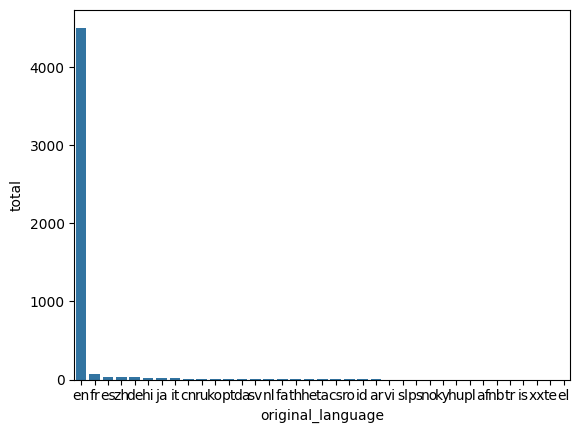

In [ ]:
sns.barplot(x = 'original_language', y = 'total', data=contagem_de_linguas)

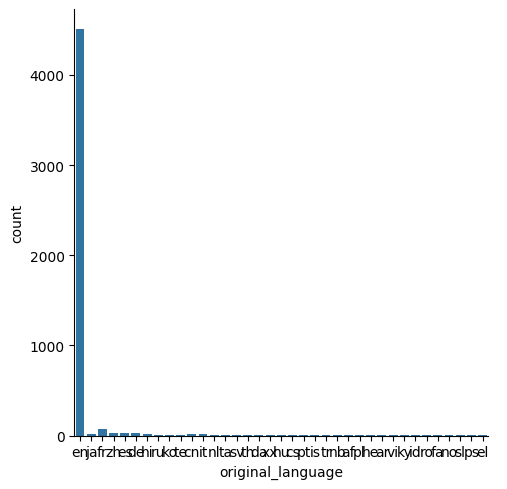

In [ ]:
sns.catplot(x='original_language', kind = 'count' ,data=tmdb)

([<matplotlib.patches.Wedge at 0x78277e4ba7a0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

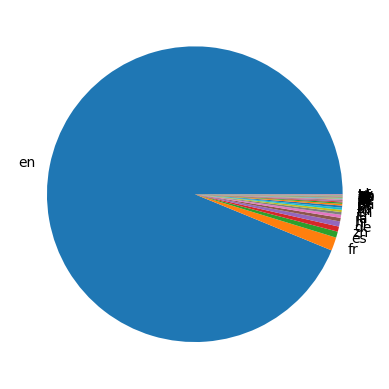

In [ ]:
plt.pie(contagem_de_linguas['total'], labels=contagem_de_linguas['original_language'])

In [ ]:
total_por_lingua = tmdb['original_language'].value_counts()

In [ ]:
total_de_ingles = total_por_lingua.loc['en']
total_soma_tudo = total_por_lingua.sum()
total_do_resto = total_soma_tudo - total_de_ingles

In [ ]:
print(f'Total de Inglês: {total_de_ingles}, e total das demais linguas: {total_do_resto}')

Total de Inglês: 4505, e total das demais linguas: 298


In [ ]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'resultado' : [total_de_ingles, total_do_resto]
}

In [ ]:
dados

{'lingua': ['ingles', 'outros'], 'resultado': [4505, 298]}

In [ ]:
pd.DataFrame(dados)

,lingua,resultado
0,ingles,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='resultado'>

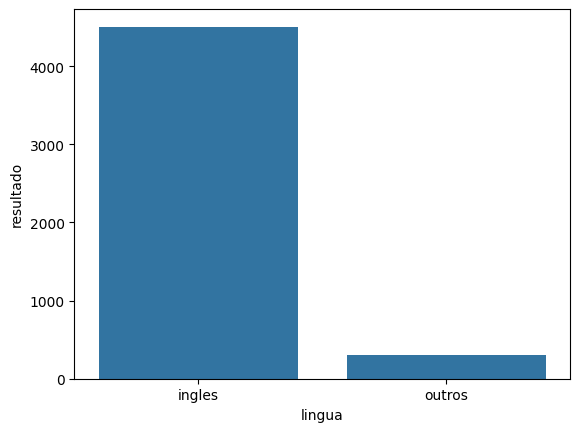

In [ ]:
sns.barplot(x = 'lingua', y = 'resultado', data = dados)

([<matplotlib.patches.Wedge at 0x78277cd5a260>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

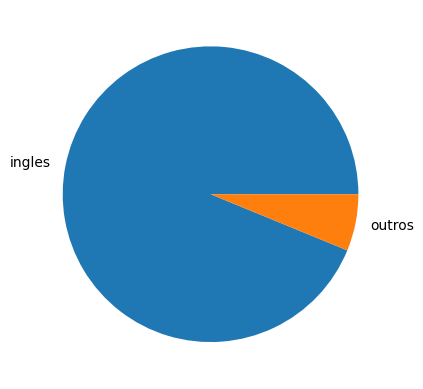

In [ ]:
plt.pie(dados['resultado'], labels = dados['lingua'])

In [ ]:
tmdb.query("original_language == 'en'")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",NaN,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,[],[],2005-03-12,0,80.0,[],Released,NaN,Cavite,7.5,2
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New Yo

In [ ]:
tmdb.query("original_language != 'en'")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47
492,8000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 16, ""nam...",NaN,293644,"[{""id"": 209714, ""name"": ""3d""}]",es,Don Gato: El inicio de la pandilla,Top Cat has arrived to charm his way into your...,0.719996,"[{""name"": ""Anima Estudios"", ""id"": 9965}, {""nam...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}, {""iso_...",2015-10-30,0,89.0,[],Released,NaN,Top Cat Begins,5.3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,90414,"[{""id"": 187056, ""name"": ""woman director""}]",fr,"I Love You, Don't Touch Me!","The story of a 25 year old virgin girl, lookin...",0.020839,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-01-21,0,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just Your Typical Boy-Loves-Girl Who Doesn't L...,"I Love You, Don't Touch Me!",6.0,1
4751,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,42109,[],pt,"Gabriela, Cravo e Canela","In 1925, Gabriela becomes cook, mistress, and ...",0.557602,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",1983-03-24,0,99.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,NaN,Gabriela,6.0,2
4790,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10769, ""n...",NaN,13898,[],fa,دایره,Various women struggle to function in the oppr...,1.193779,"[{""name"": ""Jafar Panahi Film Productions"", ""id...","[{""iso_3166_1"": ""IR"", ""name"": ""Iran""}]",2000-09-08,0,90.0,"[{""iso_639_1"": ""fa"", ""name"": ""\u0641\u0627\u06...",Released,NaN,The Circle,6.6,17
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",NaN,36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of grueso

In [ ]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()

In [ ]:
total_por_lingua_de_outros_filmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

In [ ]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")

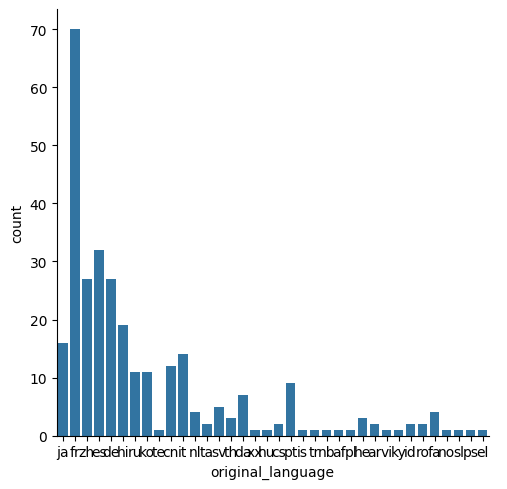

In [ ]:
sns.catplot(x = 'original_language', kind='count', data=filmes_sem_lingua_original_em_ingles)

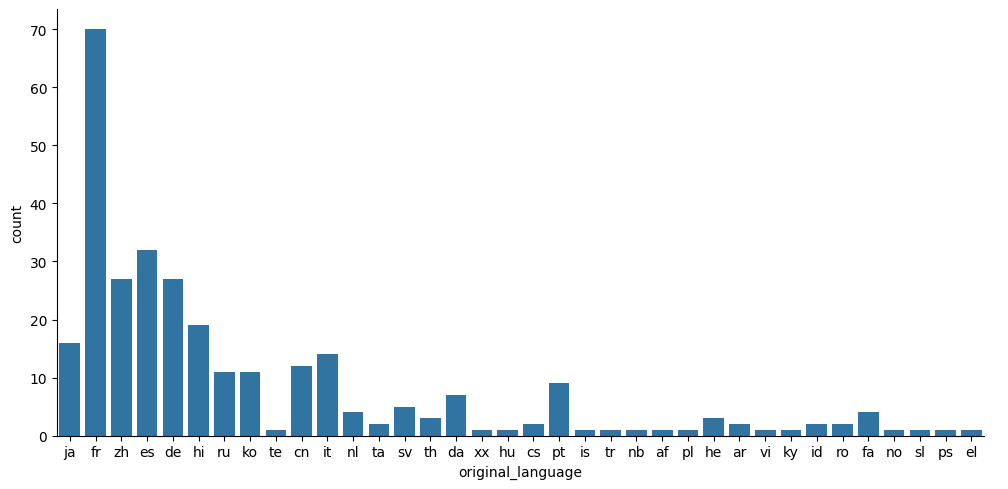

In [ ]:
sns.catplot(
    x = 'original_language',
    kind='count',
    data=filmes_sem_lingua_original_em_ingles,
    aspect=2
)

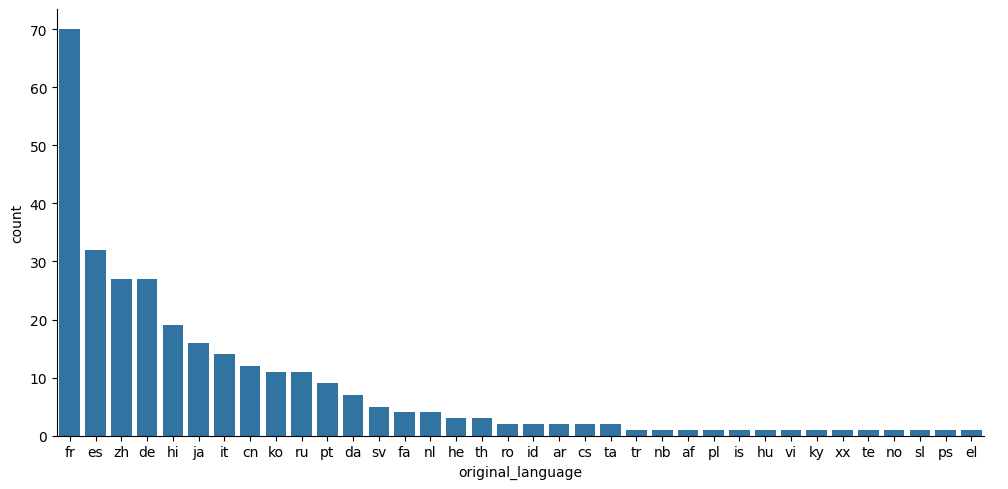

In [ ]:
sns.catplot(
    x = 'original_language',
    kind='count',
    data=filmes_sem_lingua_original_em_ingles,
    aspect=2,
    order=total_por_lingua_de_outros_filmes.index
)

<ipython-input-180-ff40a921c77a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(


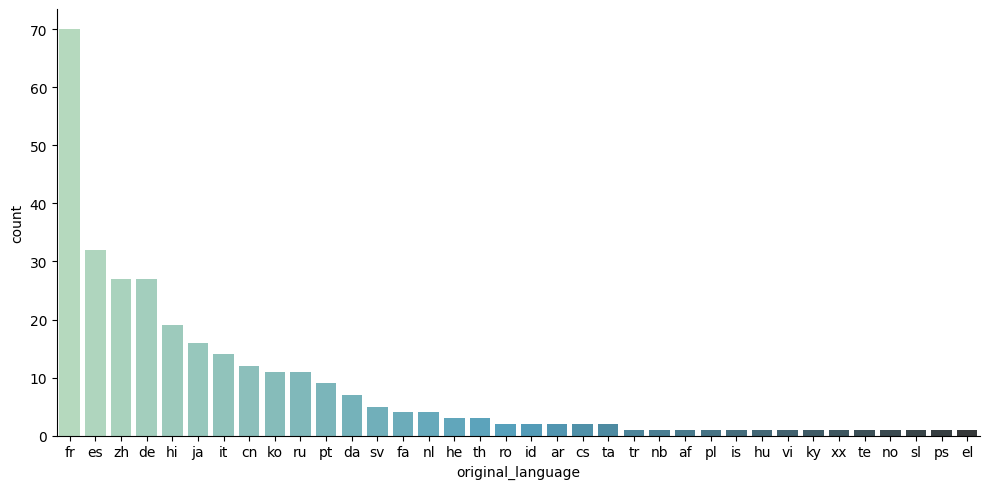

In [ ]:
sns.catplot(
    x = 'original_language',
    kind='count',
    data=filmes_sem_lingua_original_em_ingles,
    aspect=2,
    palette='GnBu_d',
    order=total_por_lingua_de_outros_filmes.index
)

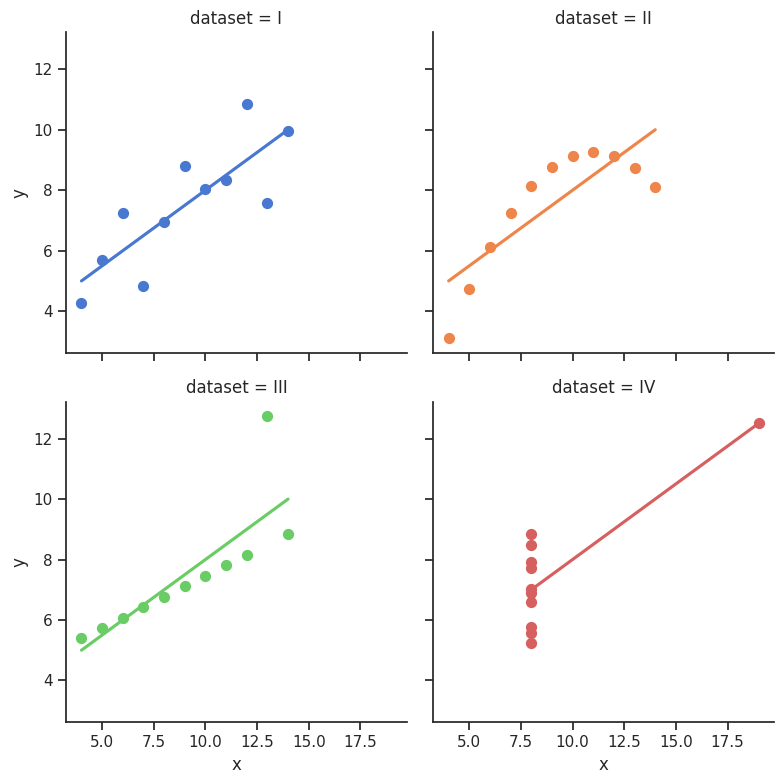

In [ ]:
#gráfico linear

sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})


# Revisando o papel da média, mediana, medida de tendência central, dispersão, desvio padrão, boxplot e histograma

In [ ]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas_toy_story = notas.query("filmeId==1")
notas_jumanji   = notas.query("filmeId==2")


In [ ]:
print(f'notas do Toy Story {len(notas_toy_story)} e notas do Jumanji {len(notas_jumanji)}')

notas do Toy Story 215 e notas do Jumanji 110


In [ ]:
print("Nota média do Toy Story %.2f" % notas_toy_story.nota.mean())

Nota média do Toy Story 3.92


In [ ]:
print("Nota média do Jumanji %.2f" % notas_jumanji.nota.mean())

Nota média do Jumanji 3.43


In [ ]:
print("A mediana do Toy Story %.2f" % notas_toy_story.nota.median())

A mediana do Toy Story 4.00


In [ ]:
print("A mediana do Jumanji %.2f" % notas_jumanji.nota.median())

A mediana do Jumanji 3.50


In [ ]:
import numpy as np

In [ ]:
np.array([2.5] * 10)

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5])

In [ ]:
np.array([3.5] * 10)

array([3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5])

In [ ]:
filme_1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme_1

array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 3.5, 3.5, 3.5,
       3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5])

In [ ]:
filme_2 = np.append(np.array([5] * 10), np.array([1] * 10))
filme_2

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
filme_1.mean()

3.0

In [ ]:
filme_2.mean()

3.0

In [ ]:
np.median(filme_1)

3.0

In [ ]:
np.median(filme_2)

3.0

<ipython-input-238-87a0c17ee207>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filme_1)
<ipython-input-238-87a0c17ee207>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filme_2)


<Axes: ylabel='Density'>

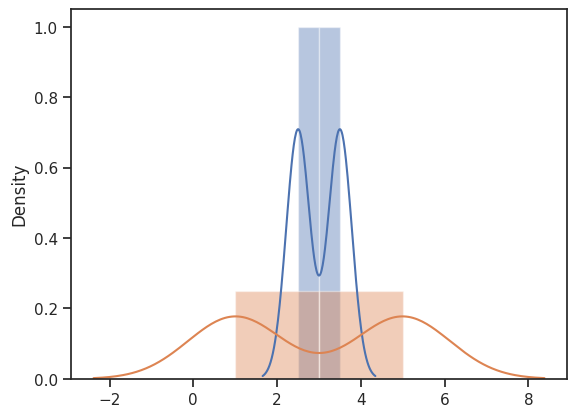

In [ ]:
sns.distplot(filme_1)
sns.distplot(filme_2)

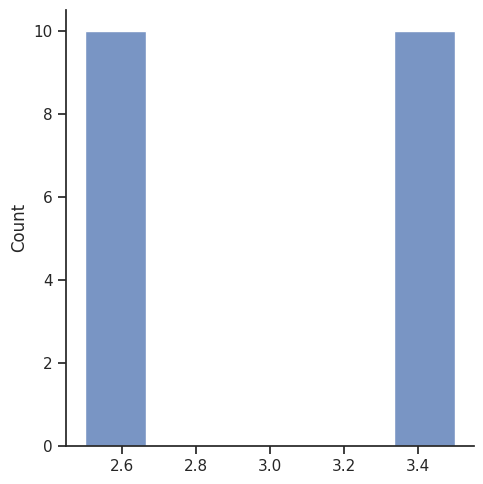

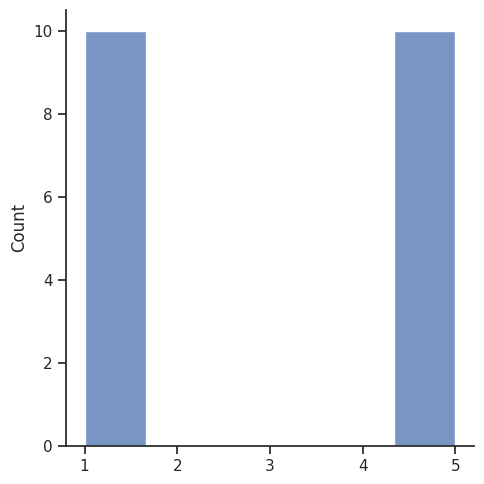

In [ ]:
sns.displot(filme_1)
sns.displot(filme_2)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

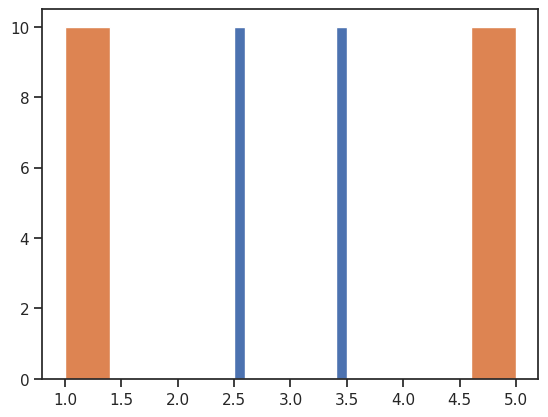

In [ ]:
plt.hist(filme_1)
plt.hist(filme_2)

{'whiskers': [<matplotlib.lines.Line2D at 0x782779cc15a0>,
 'caps': [<matplotlib.lines.Line2D at 0x782779cc1ae0>,
 'boxes': [<matplotlib.lines.Line2D at 0x782779cc1300>,
 'medians': [<matplotlib.lines.Line2D at 0x782779cc2020>,
 'fliers': [<matplotlib.lines.Line2D at 0x782779cc22c0>,
 'means': []}

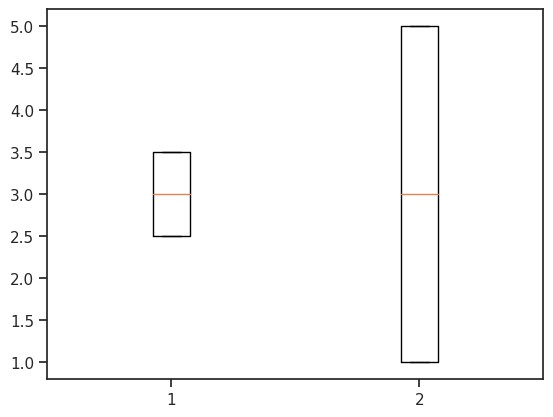

In [ ]:
plt.boxplot([filme_1,filme_2])

<Axes: ylabel='nota'>

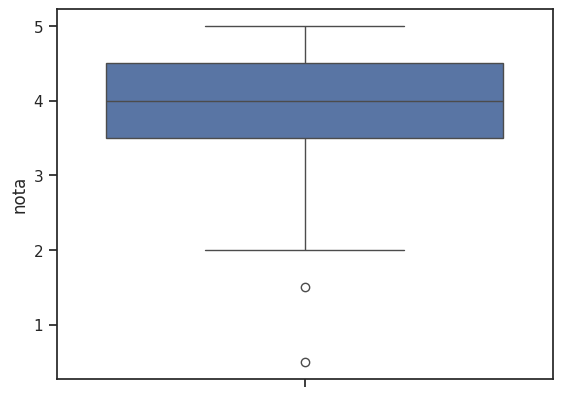

In [ ]:
sns.boxplot(notas_toy_story.nota)

<Axes: ylabel='nota'>

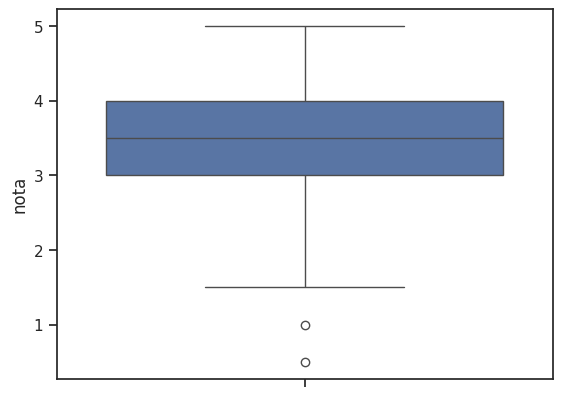

In [ ]:
sns.boxplot(notas_jumanji.nota)

<Axes: ylabel='nota'>

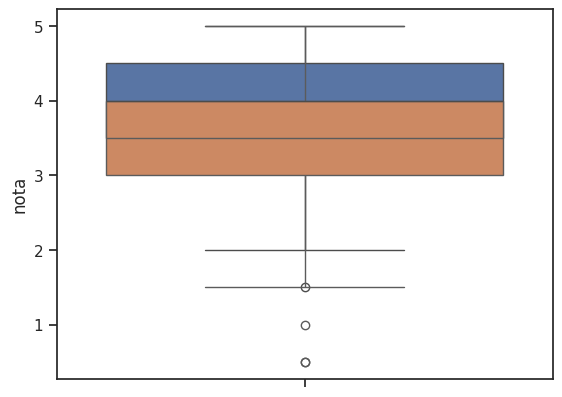

In [ ]:
sns.boxplot(notas_toy_story.nota)
sns.boxplot(notas_jumanji.nota)

{'whiskers': [<matplotlib.lines.Line2D at 0x78277cbdb850>,
 'caps': [<matplotlib.lines.Line2D at 0x782779979cf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7827797aa8f0>,
 'medians': [<matplotlib.lines.Line2D at 0x78277997b580>,
 'fliers': [<matplotlib.lines.Line2D at 0x782779b28400>,
 'means': []}

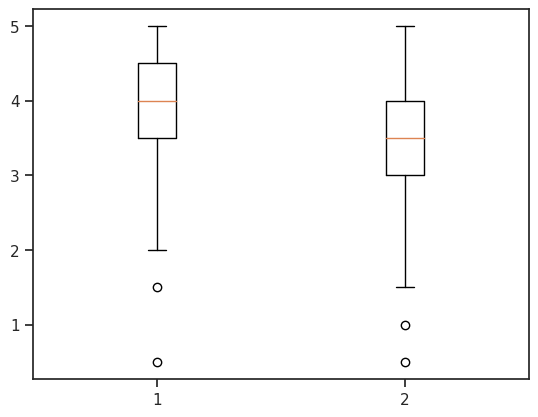

In [ ]:
plt.boxplot([notas_toy_story.nota, notas_jumanji.nota])

<Axes: xlabel='filmeId', ylabel='nota'>

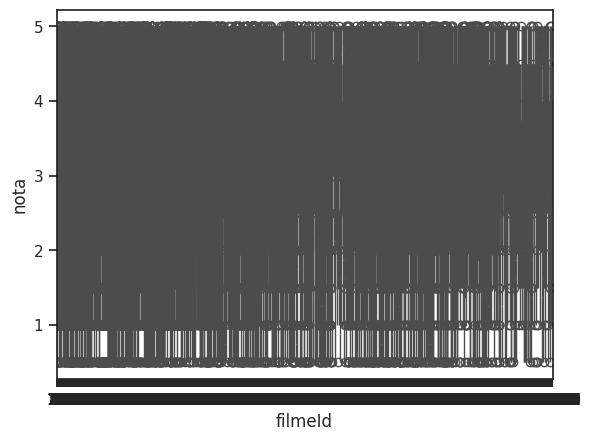

In [ ]:
sns.boxplot(x = 'filmeId', y = 'nota', data=notas)

<Axes: xlabel='filmeId', ylabel='nota'>

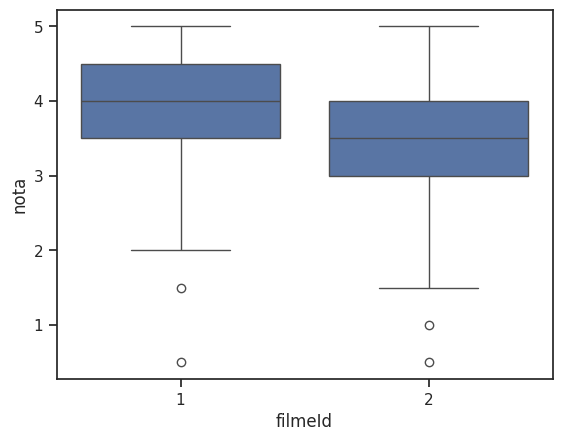

In [ ]:
sns.boxplot(x = 'filmeId', y = 'nota', data=notas.query("filmeId in[1,2]"))

<Axes: xlabel='filmeId', ylabel='nota'>

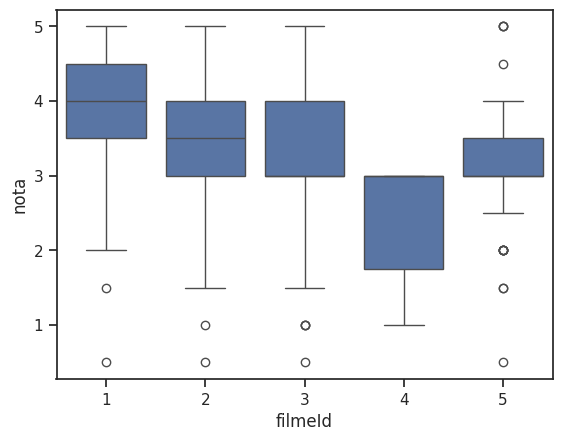

In [ ]:
sns.boxplot(x = 'filmeId', y = 'nota', data=notas.query("filmeId in[1,2,3,4,5]"))

In [ ]:
notas_jumanji.nota.std()

0.8817134921476455

In [ ]:
notas_toy_story.nota.std()

0.8348591407114047

In [ ]:
filme_1.std()

0.5

In [ ]:
filme_2.std()

2.0